In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

匯入data

In [3]:
x = np.genfromtxt('preprocessed_x.csv', delimiter=',')
y = np.genfromtxt('preprocessed_y.csv', delimiter=',', dtype= None)

In [4]:
feature_names=[]
for names in y:
  if names not in feature_names:
    feature_names.append(names)

AdaBoost
                   precision    recall  f1-score   support

      b'bathroom'       0.47      0.40      0.43        20
       b'driving'       0.72      0.38      0.50       130
        b'eating'       0.48      0.16      0.24       153
         b'lying'       0.74      0.38      0.50       183
       b'sitting'       0.62      0.82      0.70       642
b'using_computer'       0.80      0.90      0.85       828
       b'walking'       0.94      0.33      0.49        96

         accuracy                           0.71      2052
        macro avg       0.68      0.48      0.53      2052
     weighted avg       0.71      0.71      0.68      2052



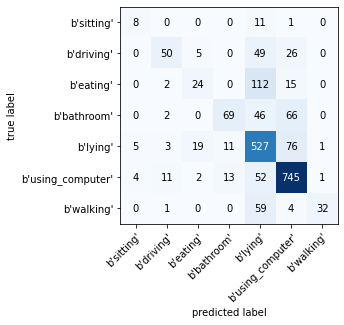

In [5]:
adb = AdaBoostClassifier(base_estimator = RandomForestClassifier(), n_estimators=50, learning_rate=1.0, 
                         algorithm='SAMME.R', random_state=None)

fin_pred = cross_val_predict(adb, x, y, cv=5)
print("AdaBoost")
print(classification_report(y, fin_pred))

cm = confusion_matrix(y_target=y, 
            y_predicted=fin_pred, 
            binary=False)
fig,ax=plot_confusion_matrix(conf_mat=cm
            ,show_absolute=True
            ,show_normed=False
            ,colorbar=False
            ,class_names=feature_names
            #,cmap='PuBu'
            ,fontcolor_threshold=0.6
            )
plt.show()